In [ ]:
# Initialize  Spark Session
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("book_genome").getOrCreate()

In [ ]:
# We load your metadata
df = spark.read.json("book-genome\\book_dataset\\raw\\metadata.json")


In [ ]:
#First we verify if the files exist"
import os

file_path = "book-genome/book_dataset/raw/metadata.json"
print("File exists:", os.path.exists(file_path))


File exists: True


In [8]:
# We view the data structure 
df.printSchema()
df.show(50, truncate=False)


root
 |-- authors: string (nullable = true)
 |-- description: string (nullable = true)
 |-- img: string (nullable = true)
 |-- item_id: long (nullable = true)
 |-- lang: string (nullable = true)
 |-- title: string (nullable = true)
 |-- url: string (nullable = true)
 |-- year: long (nullable = true)

+----------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#We then get the summarry statistics of the dataset.
df.describe().show()


+-------+--------------------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+-----------------+
|summary|             authors|         description|                 img|             item_id| lang|               title|                 url|             year|
+-------+--------------------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+-----------------+
|  count|                9374|                9374|                9374|                9374| 9374|                9374|                9374|             9374|
|   mean|                NULL|                NULL|                NULL|1.7907639113292083E7| NULL|  1134.1666666666667|                NULL|1740.745039470877|
| stddev|                NULL|                NULL|                NULL|1.6093546891874325E7| NULL|   998.3515245977574|                NULL|684.7701305719293|
|    min|     A. Lee Martinez|\nIt's be

In [10]:
# Now we check missing values.
from pyspark.sql.functions import col, sum

df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns]).show()


+-------+-----------+---+-------+----+-----+---+----+
|authors|description|img|item_id|lang|title|url|year|
+-------+-----------+---+-------+----+-----+---+----+
|      0|          0|  0|      0|   0|    0|  0|   0|
+-------+-----------+---+-------+----+-----+---+----+



In [ ]:
# We analyzing Books by Publication Year by counting books per year.
df.groupBy("year") \
  .agg(count("*").alias("book_count")) \
  .orderBy("year") \
  .show(df.count(), False)  # Shows all rows



+----+----------+
|year|book_count|
+----+----------+
|   0|      1256|
|1912|         1|
|1936|         1|
|1950|         1|
|1952|         1|
|1957|         1|
|1959|         1|
|1961|         1|
|1962|         1|
|1963|         1|
|1964|         1|
|1969|         1|
|1971|         1|
|1972|         4|
|1973|         1|
|1974|         1|
|1975|         1|
|1976|         4|
|1977|         4|
|1978|         4|
|1979|         5|
|1980|         4|
|1981|         4|
|1982|         5|
|1983|         6|
|1984|         7|
|1985|         4|
|1986|         6|
|1987|        16|
|1988|         8|
|1989|        14|
|1990|        24|
|1991|        20|
|1992|        27|
|1993|        18|
|1994|        26|
|1995|        38|
|1996|        36|
|1997|        46|
|1998|        52|
|1999|        79|
|2000|        77|
|2001|        99|
|2002|       144|
|2003|       165|
|2004|       187|
|2005|       256|
|2006|       341|
|2007|       283|
|2008|       233|
|2009|       317|
|2010|       475|
|2011|    

In [20]:
# Filter books with missing/invalid years
df.filter((df.year == 0) | (df.year.isNull())).show(df.count())


+--------------------+--------------------+--------------------+--------+-----+--------------------+--------------------+----+
|             authors|         description|                 img| item_id| lang|               title|                 url|year|
+--------------------+--------------------+--------------------+--------+-----+--------------------+--------------------+----+
|        Markus Zusak|A story about, am...|https://images.gr...|  878368|  eng|      The Book Thief|https://www.goodr...|   0|
|        Ransom Riggs|A mysterious isla...|https://images.gr...|14345371|en-US|Miss Peregrine’s ...|https://www.goodr...|   0|
|    Kathryn Stockett|Be prepared to me...|https://images.gr...| 4717423|  eng|            The Help|https://www.goodr...|   0|
|           Jay Asher|You can't stop th...|https://images.gr...| 2588213|  eng|Thirteen Reasons Why|https://www.goodr...|   0|
|        Gayle Forman|Librarian note: a...|https://images.gr...| 4422413|en-US|If I Stay (If I S...|https://www

In [23]:
# We the analyse the most popular authors in terms of number of books published
from pyspark.sql.functions import count

df.groupBy("authors").agg(count("*").alias("book_count")).orderBy("book_count", ascending=False).show(df.count())



+--------------------+----------+
|             authors|book_count|
+--------------------+----------+
|        Stephen King|        61|
|      Kristen Ashley|        48|
|        John Grisham|        33|
|         Abbi Glines|        32|
|        Nora Roberts|        31|
|         Neil Gaiman|        30|
|     Janet Evanovich|        30|
| Laurell K. Hamilton|        29|
|     Terry Pratchett|        29|
|       Richelle Mead|        29|
|     James Patterson|        29|
|        Nalini Singh|        28|
|Jennifer L. Armen...|        28|
|         Dean Koontz|        27|
|    Sherrilyn Kenyon|        26|
|           Meg Cabot|        26|
|           J.R. Ward|        26|
|    Michael Connelly|        26|
|        Lisa Kleypas|        25|
|        Rick Riordan|        25|
|    Charlaine Harris|        24|
|         Jim Butcher|        23|
|        Jodi Picoult|        23|
|       Ilona Andrews|        23|
|           J.D. Robb|        23|
|      Gena Showalter|        22|
|   Brandon Sa

In [24]:
#count books by language
df.groupBy("lang").count().orderBy("count", ascending=False).show()


+-----+-----+
| lang|count|
+-----+-----+
|  eng| 7059|
|en-US| 1456|
|"NaN"|  556|
|en-GB|  219|
|en-CA|   82|
|   en|    2|
+-----+-----+



In [26]:
conda install matplotlib


Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\cheoc\anaconda3\envs\mysparkenv

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    brotli-python-1.0.9        |  py311h5da7b33_9         346 KB
    contourpy-1.3.1            |  py311h214f63a_0         232 KB
    cycler-0.11.0              |     pyhd3eb1b0_0          12 KB
    fonttools-4.55.3           |  py311h827c3e9_0         2.7 MB
    freetype-2.13.3            |       h0620614_0         554 KB
    icu-73.1                   |       h6c2663c_0        29.5 MB
    intel-openmp-2023.1.0      |   h59b6b97_46320         2.7 MB
    jpeg-9e                    |       h827c3e9_3         334 KB
    kiwisolver-1.4.8           |  py311h5da7b33_0          63



==> WARNING: A newer version of conda exists. <==
    current version: 25.1.1
    latest version: 25.3.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [28]:
conda install pandas


Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\cheoc\anaconda3\envs\mysparkenv

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bottleneck-1.4.2           |  py311h57dcf0c_0         146 KB
    numexpr-2.10.1             |  py311h4cd664f_0         207 KB
    pandas-2.2.3               |  py311h5da7b33_0        14.7 MB
    python-tzdata-2023.3       |     pyhd3eb1b0_0         140 KB
    pytz-2024.1                |  py311haa95532_0         223 KB
    ------------------------------------------------------------
                                           Total:        15.4 MB

The following NEW packages will be INSTALLED:

  bottleneck         pkgs/main/win-64::bottleneck-1.4.2-py311h57dcf0c_0 
  numexpr            pkgs/main/win-64::numexpr-2.10.1-py311h4cd664f_0 
  p



==> WARNING: A newer version of conda exists. <==
    current version: 25.1.1
    latest version: 25.3.1

Please update conda by running

    $ conda update -n base -c defaults conda




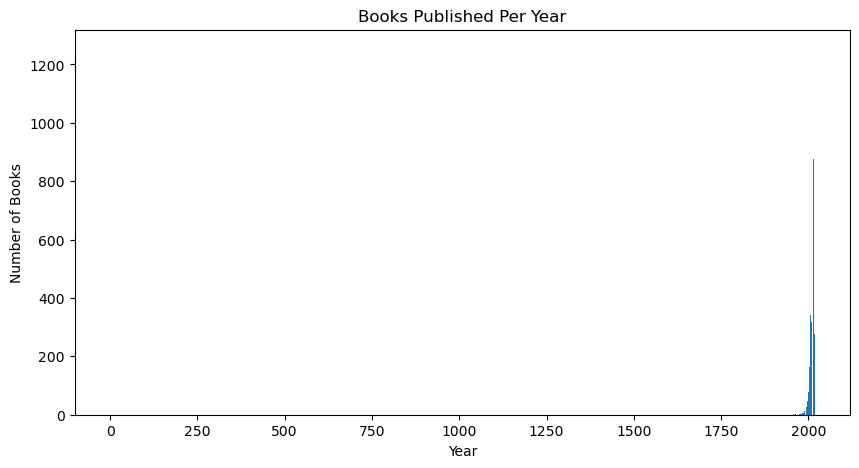

In [ ]:
# We the visualize the data
# Books Published Per Year.
import matplotlib.pyplot as plt

pdf = df.groupBy("year").count().toPandas()

plt.figure(figsize=(10, 5))
plt.bar(pdf["year"], pdf["count"])
plt.xlabel("Year")
plt.ylabel("Number of Books")
plt.title("Books Published Per Year")
plt.show()


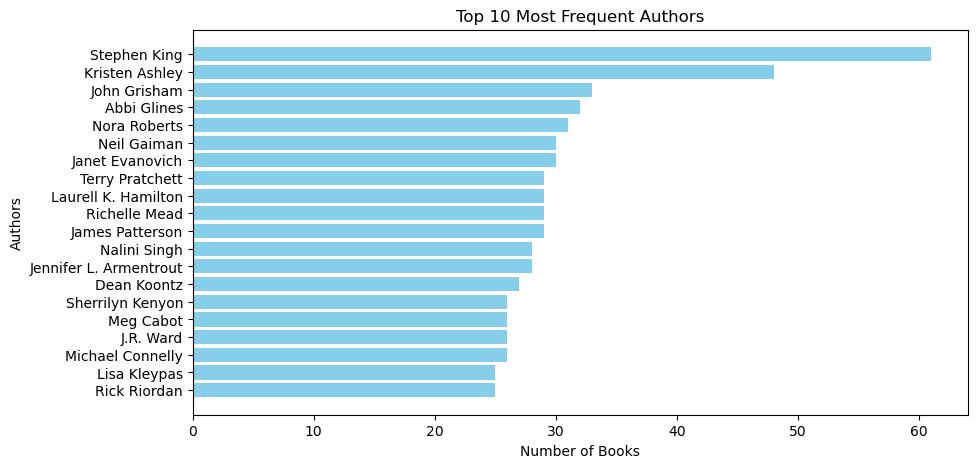

In [31]:
# 20 Most Frequent Authors
top_authors = df.groupBy("authors").count().orderBy("count", ascending=False).limit(20).toPandas()

plt.figure(figsize=(10, 5))
plt.barh(top_authors["authors"], top_authors["count"], color="skyblue")
plt.xlabel("Number of Books")
plt.ylabel("Authors")
plt.title("Top 10 Most Frequent Authors")
plt.gca().invert_yaxis()
plt.show()
